<p  style="z-index: 101;background: #fde073;text-align: center;line-height: 2.5;overflow: hidden;font-size:22px;">Please <a href="https://github.com/ECSIM/opem#cite" target="_blank">cite us</a> if you use the software</p>

#  Padulles Dynamic Model II

### Version 1.2

<ul>
    <li><a href="#Overview">Overview</a></li>
    <li><a href="#Nernst-Voltage">Nernst Voltage</a></li>
    <ul>
        <li><a href="#FC-Voltage">FC Voltage</a></li>
    </ul>
    <li><a href="#Power-of-PEMFC">Power of PEMFC</a></li>
    <li><a href="#Efficiency-of-PEMFC">Efficiency of PEMFC</a></li>
    <li><a href="#Linear-Approximation">Linear Approximation</a></li>
    <li><a href="#Overall-Parameters">Overall Parameters</a></li>
    <li><a href="#Full-Run">Full Run</a></li>
    <li><a href="#Plot">Plot</a></li>
    <li><a href="#Parameters">Parameters</a></li>
    <li><a href="#Reference">Reference</a></li>   
</ul>

## Overview

<p style="text-align:justify;">
The Padulles dynamic model can predict the transient response of cell voltage, temperature of the cell, hydrogen/oxygen out flow rates and cathode and anode channel temperatures/pressures under sudden change in load current. Hence, a dynamic fuel cell simulation is developed in this model, which incorporates the dynamics of flow and pressure in the anode and cathode channels and mass/ heat transfer transient features in the fuel cell body.
<br/>This model is based on several assumptions: 
<ol>    
<li>The stack is fed with hydrogen and air</li>   
<li>Cell temperature is stable at all times</li>   
<li>The ratio of pressures between the interior and exterior of the electrode channels is large</li>  
<li>The channels that transport gases along the electrodes have a fixed volume </li>    
<li>Only source of voltage loss is ohmic polarization</li>     
<li>Nernst equation can be applied too</li>
</ol>
</p>

<p style="text-align:justify;">
In this model, Nernst and fuel cell potential were modeled as a function of water, oxygen and hydrogen gases partial pressure that can be calculated from independent variables or constants. The partial pressure of gases is proportional to the molar flow of each gas. 
</p>

<div style="text-align:center;">
    
<img src="images/Padulles2-Diagram.jpg">  
<p style="text-align:center;">Fig1. Padulles-2 Dynamic Model Block Diagram </p>
    
</div>

## Nernst Voltage

$$E_{Nernst}=N_0\times [E_0+\frac{RT}{2F}ln(\frac{P_{H_2}\times \sqrt{P_{O_2}}}{P_{H_2O}})]$$

$$P_{H_2}=\frac{\frac{1}{K_{H_2}}}{1+\tau_{H_2}^{(s)}}[(q_{H_2}^{(inlet)}-(2\times K_r \times i)]$$

$$P_{O_2}=\frac{\frac{1}{K_{O_2}}}{1+\tau_{O_2}^{(s)}}[(q_{O_2}^{(inlet)}-(K_r \times i)]$$

$$P_{H_2O}=\frac{\frac{1}{K_{H_2O}}}{1+\tau_{H_2O}^{(s)}}[(q_{H_2O}^{(inlet)}-(2\times K_r \times i)]$$

$$K_r=\frac{N_0}{4F}$$

$$q_{O_2}^{(inlet)}=\frac{q_{H_2}^{(inlet)}}{r_{h-o}}$$

$$q_{H_2O}^{(inlet)}=q_{H_2}^{(inlet)}$$

In [1]:
from opem.Dynamic.Padulles2 import Kr_Calc,qO2_Calc,PH2_Calc,PO2_Calc,PH2O_Calc,Enernst_Calc

In [2]:
Kr=Kr_Calc(N0=5)
Kr

1.2955435375179044e-08

In [3]:
qO2=qO2_Calc(qH2=0.0004,rho=1.168)
qO2

0.0003424657534246576

In [4]:
PH2=PH2_Calc(KH2=0.0004,tH2=3.37,Kr=Kr,I=1,qH2=0.0004)
PH2

0.22881812879247693

In [5]:
PO2=PO2_Calc(KO2=0.0000211,tO2=6.74,Kr=Kr,I=1,qO2=qO2)
PO2

2.0968979878594753

In [6]:
PH2O=PH2O_Calc(KH2O=0.000007716,tH2O=18.418,Kr=Kr,I=1,qH2O=0.0004)
PH2O

2.669532068584946

In [7]:
Enernst=Enernst_Calc(E0=0.6,N0=5,T=343, PH2=PH2, PO2=PO2,PH2O=PH2O)
Enernst

2.845819522254369

### FC Voltage

$$V_{Fuelcell}=E_{Nernst}-Bln(Ci)-(R^{int}\times i)$$

In [8]:
from opem.Dynamic.Padulles2 import Vcell_Calc
FC_Voltage=Vcell_Calc(Enernst=Enernst, B=0.04777,C=0.0136,I=1,Rint=0.00303)
FC_Voltage

3.0480899579320604

## Power of PEMFC

$$P=V_{cell}\times i$$

$$P_{Thermal}=i\times(N \times E_{th}-V_{Stack})$$

$$E_{th}=\frac{-\Delta H}{nF}=1.23V$$

In [9]:
from opem.Dynamic.Padulles2 import Power_Calc,Power_Thermal_Calc
Power=Power_Calc(Vcell=FC_Voltage,i=2)
Power

6.096179915864121

In [10]:
Power_Thermal_Calc(VStack=FC_Voltage,N=5,i=2)

6.20382008413588

## Efficiency of PEMFC

$$\eta=\frac{\mu_F\times V_{Fuelcell}}{N_0\times HHV}$$

In [11]:
from opem.Dynamic.Padulles2 import Efficiency_Calc
Efficiency_Calc(Vcell=FC_Voltage,N=5)

0.3907807638374436

## Linear Approximation

Sometimes quick calculations regarding fuel cell efficiency–power-size relationships need to be made. Linear approximation is a good method to find a rough estimate of the value of polarization function at a particular point. A linear polarization curve has the following form:
$$V_{cell}=V_0-kI$$
where V0 is the intercept (actual open circuit voltage is always higher) and k is the slope of the curve.

* Notice : <a href="https://en.wikipedia.org/wiki/Simple_linear_regression">Simple linear regression</a> used for this approximation

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$V_0$$</td>
        <td style="text-align:center;">Intercept of the curve obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
    <tr>
        <td>$$k$$</td>
        <td style="text-align:center;">Slope of the curve obtained by linear approximation</td>
        <td>$$A^{-1}$$</td>
    </tr>
    <tr>
        <td>$$P_{max}$$</td>
        <td style="text-align:center;">Maximum power obtained by linear approximation</td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power obtained by linear approximation</td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : These parameters are only available in HTML report

## Overall Parameters

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
    </tr> 
    <tr>
        <td>$$\eta|P_{Max}$$</td>
        <td style="text-align:center;">Cell efficiency at maximum power</td>
        <td>$$--$$</td>
    </tr>
    <tr>
        <td>$$P_{Max}$$</td>
        <td style="text-align:center;">Maximum power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Elec} $$</td>
        <td style="text-align:center;">Total electrical power </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$P_{Thermal} $$</td>
        <td style="text-align:center;">Total thermal power   </td>
        <td>$$W$$</td>
    </tr>
    <tr>
        <td>$$V_{FC}|P_{Max}$$</td>
        <td style="text-align:center;">Cell voltage at maximum power </td>
        <td>$$V$$</td>
    </tr>
   
     
    
    
    
</table>

* Notice : P(Thermal) & P(Elec) calculated by <a href="https://en.wikipedia.org/wiki/Simpson%27s_rule">Simpson's Rule</a>

* Notice : These parameters are only available in HTML report

## Full Run

* Run from `i`=0.1 to `i`=100 with `step`=0.1

In [12]:
Test_Vector = {
    "T": 343,
    "E0": 0.6,
    "N0": 5,
    "KO2": 0.0000211,
    "KH2": 0.0000422,
    "KH2O": 0.000007716,
    "tH2": 3.37,
    "tO2": 6.74,
    "tH2O": 18.418,
    "B": 0.04777,
    "C": 0.0136,
    "Rint": 0.00303,
    "rho": 1.168,
    "qH2": 0.0004,
    "i-start": 0.1,
    "i-stop": 100,
    "i-step": 0.1,
    "Name": "Padulles2_Test"}


* Notice : "Name", new in version 0.5

In [13]:
from opem.Dynamic.Padulles2 import Dynamic_Analysis
data=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=True)

###########
Padulles-II-Model Simulation
###########
Analyzing . . .
I : 0.1
E : 3.0120122442199793 V
FC Efficiency : 0.4265389961269225 
FC Power : 0.33270041697899955 W
FC Voltage : 3.3270041697899955 V
PH2 : 2.169018669476965 atm
PH2O : 2.669687710942903 atm
PO2 : 2.09696938340326 atm
Power-Thermal : 0.2822995830210005 W
###########
I : 0.2
E : 3.012012104448671 V
FC Efficiency : 0.42225504989786394 
FC Power : 0.6587178778406679 W
FC Voltage : 3.293589389203339 V
PH2 : 2.1690046190953503 atm
PH2O : 2.6696704173475743 atm
PO2 : 2.0969614505650616 atm
Power-Thermal : 0.5712821221593323 W
###########
I : 0.3
E : 3.0120119646768333 V
FC Efficiency : 0.4197329719509197 
FC Power : 0.9821751543651522 W
FC Voltage : 3.273917181217174 V
PH2 : 2.1689905687137356 atm
PH2O : 2.669653123752246 atm
PO2 : 2.0969535177268637 atm
Power-Thermal : 0.8628248456348478 W
###########
I : 0.4
E : 3.0120118249044676 V
FC Efficiency : 0.41793223959535725 
FC Power : 1.3039485875375147 W
FC Voltage : 3.2598

PO2 : 2.095382815763599 atm
Power-Thermal : 63.05294967619057 W
###########
I : 20.2
E : 3.0119841395535847 V
FC Efficiency : 0.38621757913060845 
FC Power : 60.85244176781867 W
FC Voltage : 3.012497117218746 V
PH2 : 2.1661945427724727 atm
PH2O : 2.6662116982818658 atm
PO2 : 2.095374882925401 atm
Power-Thermal : 63.377558232181336 W
###########
I : 20.3
E : 3.0119839996759152 V
FC Efficiency : 0.38614847123424434 
FC Power : 61.14274893523025 W
FC Voltage : 3.011958075627106 V
PH2 : 2.1661804923908585 atm
PH2O : 2.666194404686537 atm
PO2 : 2.0953669500872025 atm
Power-Thermal : 63.70225106476976 W
###########
I : 20.4
E : 3.011983859797716 V
FC Efficiency : 0.3860795119566403 
FC Power : 61.4329719425406 W
FC Voltage : 3.0114201932617943 V
PH2 : 2.166166442009244 atm
PH2O : 2.666177111091209 atm
PO2 : 2.095359017249004 atm
Power-Thermal : 64.0270280574594 W
###########
I : 20.5
E : 3.0119837199189874 V
FC Efficiency : 0.3860106998443028 
FC Power : 61.72311090510402 W
FC Voltage : 3.01

FC Power : 114.03911723415048 W
FC Voltage : 2.9240799290807815 V
PH2 : 2.163553071028968 atm
PH2O : 2.6629605023600997 atm
PO2 : 2.0938835093441197 atm
Power-Thermal : 125.81088276584954 W
###########
I : 39.1
E : 3.0119576932614054 V
FC Efficiency : 0.37482749470396426 
FC Power : 114.31488933481502 W
FC Voltage : 2.923654458690921 V
PH2 : 2.1635390206473533 atm
PH2O : 2.662943208764771 atm
PO2 : 2.0938755765059214 atm
Power-Thermal : 126.150110665185 W
###########
I : 39.2
E : 3.0119575532835774 V
FC Efficiency : 0.3747729872777953 
FC Power : 114.5905885900587 W
FC Voltage : 2.9232293007668035 V
PH2 : 2.1635249702657386 atm
PH2O : 2.6629259151694424 atm
PO2 : 2.093867643667723 atm
Power-Thermal : 126.48941140994133 W
###########
I : 39.3
E : 3.011957413305219 V
FC Efficiency : 0.3747185197072104 
FC Power : 114.86621503104827 W
FC Voltage : 2.922804453716241 V
PH2 : 2.1635109198841245 atm
PH2O : 2.662908621574114 atm
PO2 : 2.0938597108295247 atm
Power-Thermal : 126.82878496895172 W

FC Efficiency : 0.3645738845131864 
FC Power : 167.77690165296838 W
FC Voltage : 2.843676299202854 V
PH2 : 2.16074299470609 atm
PH2O : 2.659501783294391 atm
PO2 : 2.092296941704459 atm
Power-Thermal : 195.07309834703165 W
###########
I : 59.1
E : 3.011929687137098 V
FC Efficiency : 0.36452464891738784 
FC Power : 168.03857265793746 W
FC Voltage : 2.8432922615556255 V
PH2 : 2.1607289443244757 atm
PH2O : 2.6594844896990626 atm
PO2 : 2.0922890088662607 atm
Power-Thermal : 195.42642734206257 W
###########
I : 59.2
E : 3.0119295470531253 V
FC Efficiency : 0.364475430855735 
FC Power : 168.3001749519442 W
FC Voltage : 2.842908360674733 V
PH2 : 2.160714893942861 atm
PH2O : 2.659467196103734 atm
PO2 : 2.0922810760280623 atm
Power-Thermal : 195.7798250480558 W
###########
I : 59.3
E : 3.0119294069686218 V
FC Efficiency : 0.3644262302690406 
FC Power : 168.56170854864203 W
FC Voltage : 2.842524596098517 V
PH2 : 2.160700843561247 atm
PH2O : 2.6594499025084053 atm
PO2 : 2.092273143189864 atm
Power

PH2 : 2.158087472580971 atm
PH2O : 2.656233293777296 atm
PO2 : 2.090797635284979 atm
Power-Thermal : 263.0598805743482 W
###########
I : 78.0
E : 3.011903201825843 V
FC Efficiency : 0.35547995600674 
FC Power : 216.27400523450063 W
FC Voltage : 2.772743656852572 V
PH2 : 2.1580734221993563 atm
PH2O : 2.656216000181968 atm
PO2 : 2.0907897024467808 atm
Power-Thermal : 263.4259947654994 W
###########
I : 78.1
E : 3.011903061641416 V
FC Efficiency : 0.35543324516712704 
FC Power : 216.52282429091042 W
FC Voltage : 2.772379312303591 V
PH2 : 2.1580593718177417 atm
PH2O : 2.6561987065866393 atm
PO2 : 2.0907817696085824 atm
Power-Thermal : 263.7921757090896 W
###########
I : 78.2
E : 3.011902921456457 V
FC Efficiency : 0.3553865443680287 
FC Power : 216.7715766027228 W
FC Voltage : 2.772015046070624 V
PH2 : 2.1580453214361275 atm
PH2O : 2.6561814129913106 atm
PO2 : 2.090773836770384 atm
Power-Thermal : 264.15842339727726 W
###########
I : 78.3
E : 3.0119027812709662 V
FC Efficiency : 0.35533985

E : 3.0118807655492006 V
FC Efficiency : 0.3481189755740837 
FC Power : 255.24083289091823 W
FC Voltage : 2.7153280094778536 V
PH2 : 2.155825361141054 atm
PH2O : 2.653449024929401 atm
PO2 : 2.089520448335052 atm
Power-Thermal : 322.8591671090818 W
###########
I : 94.1
E : 3.0118806252796206 V
FC Efficiency : 0.34807359962456963 
FC Power : 255.47906065244163 W
FC Voltage : 2.7149740770716435 V
PH2 : 2.15581131075944 atm
PH2O : 2.6534317313340723 atm
PO2 : 2.0895125154968537 atm
Power-Thermal : 323.23593934755837 W
###########
I : 94.2
E : 3.011880485009508 V
FC Efficiency : 0.3480282305914117 
FC Power : 255.7172227093457 W
FC Voltage : 2.7146201986130114 V
PH2 : 2.1557972603778253 atm
PH2O : 2.6534144377387436 atm
PO2 : 2.0895045826586554 atm
Power-Thermal : 323.6127772906544 W
###########
I : 94.3
E : 3.011880344738862 V
FC Efficiency : 0.34798286845993315 
FC Power : 255.95531906701922 W
FC Voltage : 2.7142663739874786 V
PH2 : 2.155783209996211 atm
PH2O : 2.653397144143415 atm
PO2 :

* Notice : "Status", "V0", "K" and "EFF" , new in version 0.8

In [14]:
data_2=Dynamic_Analysis(InputMethod=Test_Vector,TestMode=True,PrintMode=True,ReportMode=False)

###########
Padulles-II-Model Simulation
###########
Analyzing . . .
Done!


* Notice : "PrintMode" & "ReportMode" , new in version 0.5

In [15]:
Dynamic_Analysis(InputMethod={},TestMode=True,PrintMode=False,ReportMode=True)

{'Message': '[Error] Padulles-II Simulation Failed!(Check Your Inputs)',
 'Status': False}

* Notice:

1. `TestMode` : Active test mode and get/return data as `dict`, (Default : `False`)
2. `ReportMode` : Generate reports(`.csv`,`.opem`,`.html`) and print result in console, (Default : `True`)
3. `PrintMode` : Control printing in console, (Default : `True`)

## Plot

In [16]:
import sys
!{sys.executable} -m pip install matplotlib;
import matplotlib.pyplot as plt

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
def plot_func(x,y,x_label,y_label,color='green',legend=[],multi=False):
    plt.figure()
    plt.grid()
    if multi==True:
        for index,y_item in enumerate(y):
            plt.plot(x,y_item,color=color[index])
    else:
        plt.plot(x,y,color=color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if len(legend)!=0:
        plt.legend(legend)
    plt.show()


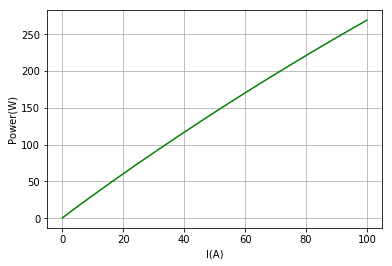

In [18]:
plot_func(data["I"],data["P"],"I(A)","Power(W)")

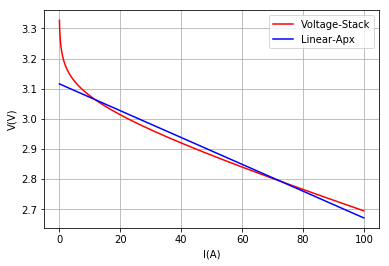

In [19]:
plot_func(data["I"],[data["V"],data["VE"]],"I(A)","V(V)",["red","blue"],legend=["Voltage-Stack","Linear-Apx"],multi=True)

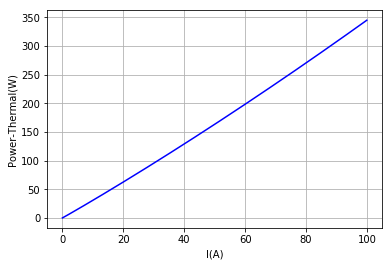

In [20]:
plot_func(data["I"],data["Ph"],"I(A)","Power-Thermal(W)","blue")

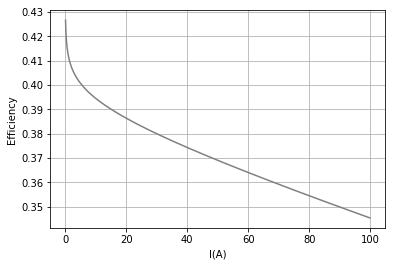

In [21]:
plot_func(data["I"],data["EFF"],"I(A)","Efficiency","gray")

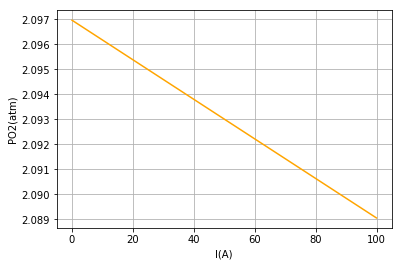

In [22]:
plot_func(data["I"],data["PO2"],"I(A)","PO2(atm)","orange")

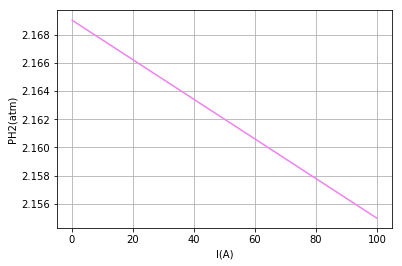

In [23]:
plot_func(data["I"],data["PH2"],"I(A)","PH2(atm)","violet")

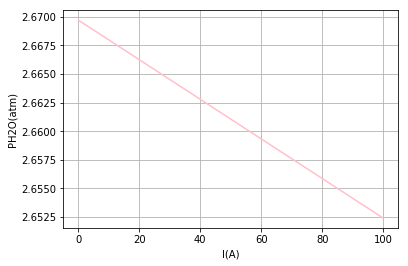

In [24]:
plot_func(data["I"],data["PH2O"],"I(A)","PH2O(atm)","pink")

<a href="Padulles-II/Padulles2_Test.html">HTML File</a>

<a href="Padulles-II/Padulles2_Test.opem">OPEM File</a>

<a href="Padulles-II/Padulles2_Test.csv">CSV File</a>

## Parameters

Inputs, Constants & Middle Values
1. User : User input
2. System : Simulator calculation (middle value)

<table style="text-align:center;">
    <tr>
        <td>$$Parameter$$</td>
        <td>$$Description$$</td>
        <td>$$Unit$$</td>
        <td>$$Value$$</td>
    </tr> 
    <tr>
        <td>$$E_0$$</td>
        <td style="text-align:center;">No load voltage</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{H_2O}$$</td>
        <td style="text-align:center;">Water valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$K_{O_2}$$</td>
        <td style="text-align:center;">Oxygen valve constant</td>
        <td>$$kmol.s^{-1}.atm^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{H_2}^{(s)}$$</td>
        <td style="text-align:center;">Hydrogen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$\tau_{H_2O}^{(s)}$$</td>
        <td style="text-align:center;">Water time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$\tau_{O_2}^{(s)}$$</td>
        <td style="text-align:center;">Oxygen time constant</td>
        <td>$$s$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$B$$</td>
        <td style="text-align:center;">Activation voltage constant</td>
        <td>$$V$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$C$$</td>
        <td style="text-align:center;">Activation constant parameter</td>
        <td>$$A^{-1}$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$R^{int}$$</td>
        <td style="text-align:center;">Fuel cell internal resistance</td>
        <td>$$\Omega$$</td>
        <td>$$User$$</td>
    </tr>
      <tr>
        <td>$$r_{h-o}$$</td>
        <td style="text-align:center;">Hydrogen-Oxygen flow ratio</td>
        <td>$$--$$</td>
        <td>$$User$$</td>
    </tr>
       <tr>
        <td>$$q_{H_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of hydrogen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$User$$</td>
     <tr>
        <td>$$i_{start}$$</td>
        <td style="text-align:center;">Cell operating current start point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{step}$$</td>
        <td style="text-align:center;">Cell operating current step</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
    <tr>
        <td>$$i_{stop}$$</td>
        <td style="text-align:center;">Cell operating current end point</td>
        <td>$$A$$</td>
        <td>$$User$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2}$$</td>
        <td style="text-align:center;">Hydrogen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{H_2O}$$</td>
        <td style="text-align:center;">Water partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$P_{O_2}$$</td>
        <td style="text-align:center;">Oxygen partial pressure</td>
        <td>$$atm$$</td>
        <td>$$System$$</td>
    </tr>
     <tr>
        <td>$$K_r$$</td>
        <td style="text-align:center;">Modeling constant</td>
        <td>$$kmol.s^{-1}.A^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
      <tr>
        <td>$$q_{O_2}^{(inlet)}$$</td>
        <td style="text-align:center;">Molar flow of oxygen</td>
        <td>$$kmol.s^{-1}$$</td>
        <td>$$System$$</td>
    </tr>
               <tr>
        <td>$$\mu_F$$</td>
        <td style="text-align:center;">The fuel utilization</td>
        <td>$$--$$</td>
        <td>$$0.95$$</td>
    </tr>
          <tr>
    <td>$$HHV$$</td>
        <td style="text-align:center;">Higher heating value potential</td>
        <td>$$V$$</td>
        <td>$$1.482$$</td>
    </tr>
             <tr>
    <td>$$R$$</td>
        <td style="text-align:center;">Universal gas constant</td>
        <td>$$J.kmol^{-1}.K^{-1}$$</td>
        <td>$$8314.47$$</td>
    </tr>
             <tr>
    <td>$$F$$</td>
        <td style="text-align:center;">Faraday’s constant</td>
        <td>$$C.kmol^{-1}$$</td>
        <td>$$96484600$$</td>
    </tr>
    <tr>
    <td>$$E_{th}$$</td>
        <td style="text-align:center;">Theoretical potential</td>
        <td>$$V$$</td>
        <td>$$1.23$$</td>
    </tr>
    
    
    
</table>

* Notice : $$q_{H_2}=q_{H_2O}$$

## Reference
<blockquote>
J. Padulles, G.W. Ault, J.R. McDonald. 2000. "An integrated SOFC plant dynamic model for power systems
simulation." Journal of Power Sources (Elsevier) 86 (1-2): 495-500. doi:10.1016/S0378-7753(99)00430-9
</blockquote>